# DATA VISUALIZATION WITH MATPLOTLIB 

## INDEX

### 1. Import Libraries  

### 2. Load Data  

### 3. View Data  
- Using `head()`  
- Using `tail()`  

### 4. Explaining Each Part of Dataset  

### 5. Basic Plots using Matplotlib  
- Line Plot  
- Scatter Plot  
- Bar Plot  

### 6. Intermediate Plots using Matplotlib  
- Histogram  
- Boxplot  
- Pie Chart  

### 7. Advanced Plots using Matplotlib  
- Heatmap of Correlation  
- Subplots  
- Two-Axis Subplots  
 

### -loading libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the samples diamond data
df = pd.read_csv("D:/diamonds2.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
1,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
2,0.2,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
3,0.2,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
4,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [3]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
53936,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
53937,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
53938,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
53939,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


### Explaining each part of diamond dataset

- **carat**: Weight of the diamond (0.2 – 5.1)
- **cut**: Quality of cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: Diamond color from D (best) to J (worst)
- **clarity**: A measurement of how clear the diamond is
- **depth**: Total depth percentage
- **table**: Width of top of diamond relative to widest point (43 – 95)
- **price**: Price in USD (326 – 18,823)
- **x**: Length in mm
- **y**: Width in mm
- **z**: Depth in mm


## BASIC PLOT USING MATPLOTLIB

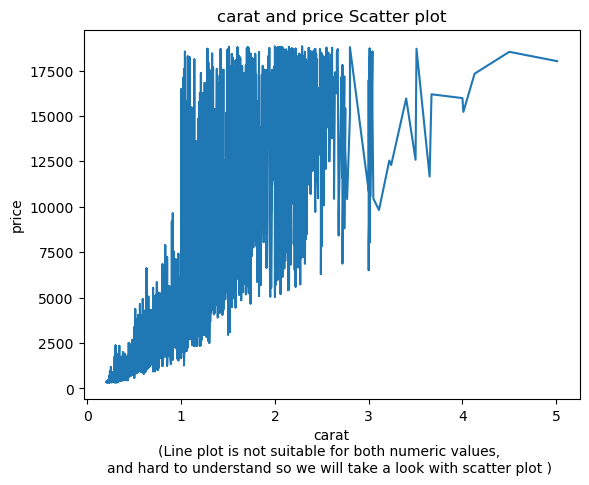

In [4]:
# Line plot
plt.plot(df['carat'],df['price'])
plt.title('carat and price Scatter plot')
plt.xlabel('carat\n(Line plot is not suitable for both numeric values, \nand hard to understand so we will take a look with scatter plot ) ')
plt.ylabel('price')
plt.show()

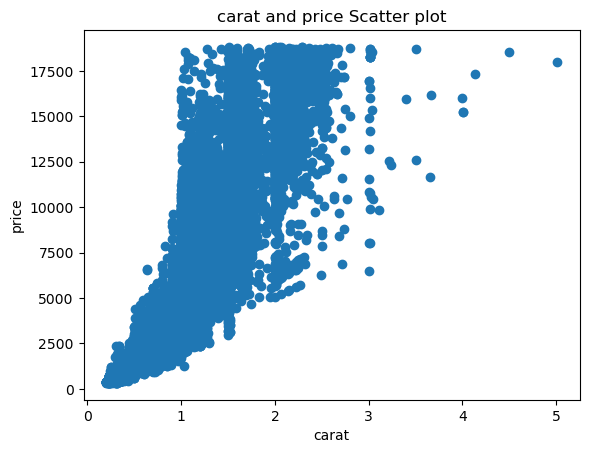

In [5]:
# scatter plot
plt.scatter(df['carat'],df['price'])
plt.title('carat and price Scatter plot')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

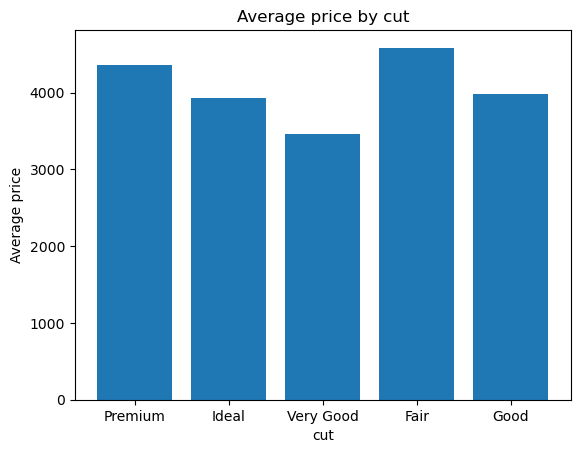

In [6]:
#Bar plot
#taking avg of price based on cut
plt.bar(df['cut'].unique(),df.groupby('cut')['price'].mean())
plt.title('Average price by cut')
plt.xlabel('cut')
plt.ylabel('Average price')
plt.show()

## INTERMEDIATE PLOTS USING MATPLOTLIB

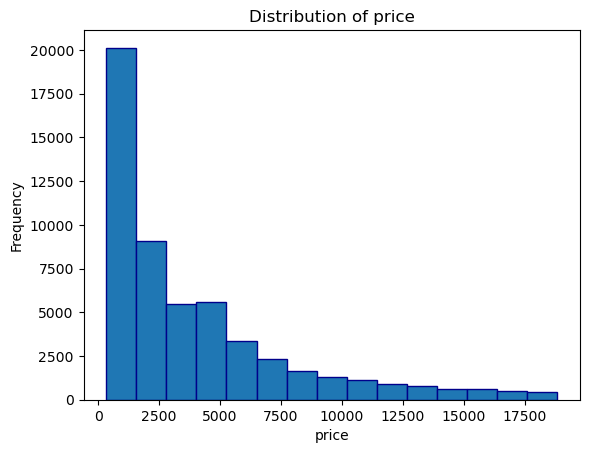

In [7]:
#histogram
#bins represent number of bars
plt.hist(df['price'],bins=15,edgecolor='darkblue')
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

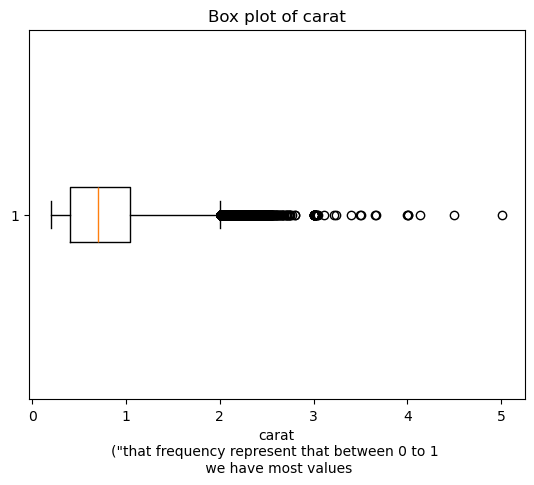

In [8]:
# box plot
plt.boxplot(df['carat'],vert=False)#for horizontal if vertical write true
plt.title("Box plot of carat")
plt.xlabel('carat\n("that frequency represent that between 0 to 1 \n we have most values')
plt.show()

In [9]:
#when we count values we get dataframe with indexes which we can easily use in pie chart
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

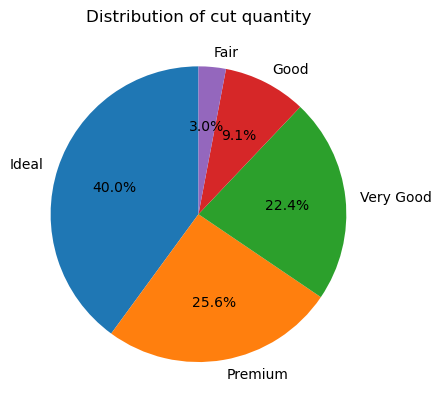

In [10]:
#pie chart
cut_counts=df['cut'].value_counts()
#       Data      ,Indexes                ,percentage       ,angle    
plt.pie(cut_counts,labels=cut_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of cut quantity')
plt.show()

## ADVANCED PLOTS USING MATPLOTLIB

In [11]:
#correlation has 1 in diagnol and if value>0 its positive otherwise negative ( numeric data vs numeric data)
correlation=df[['carat','depth','table','price','x','y','z']].corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


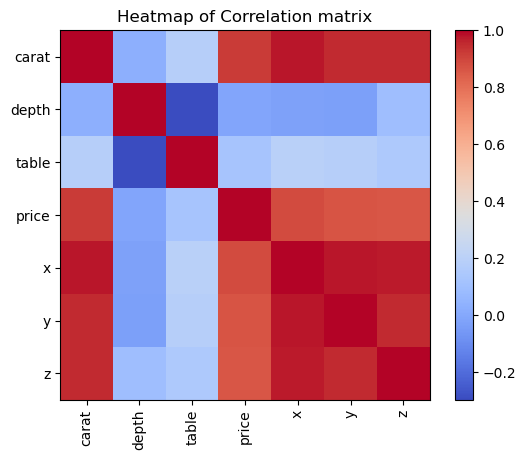

In [12]:
#heatmap of corelation matrix using matplotlib
#build in function of corr in python
#0.5> and .5< are the significant data
#here depth and table are the lowest the larger the depth the table will be smaller of diamond
correlation=df[['carat','depth','table','price','x','y','z']].corr()
plt.imshow(correlation,cmap='coolwarm',interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)),correlation.columns,rotation=90)
plt.yticks(range(len(correlation)),correlation.columns)
plt.title('Heatmap of Correlation matrix')
plt.show()

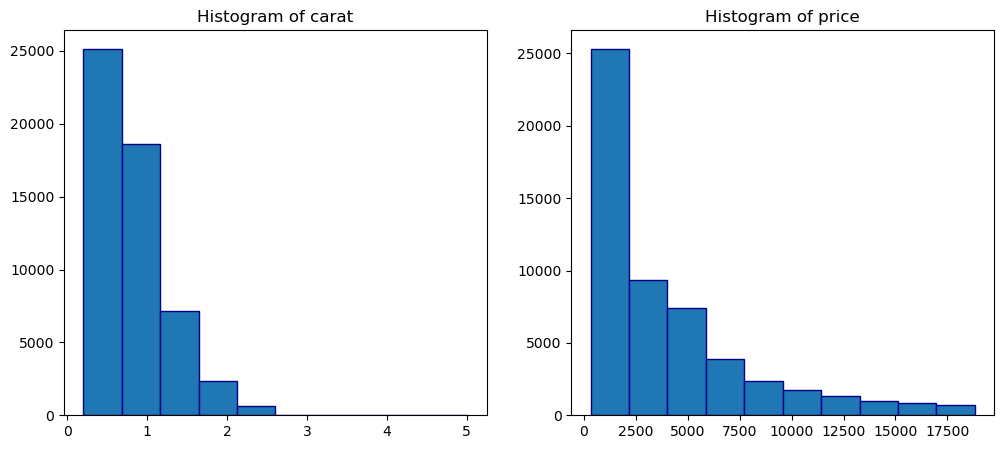

In [14]:
#subplots
#1 row,2 col(2 graphs if cut from between)
fig,axes=plt.subplots(1,2,figsize=(12,5))
#similar, histogram above graph
axes[0].hist(df['carat'],bins=10,edgecolor='darkblue')
axes[0].set_title("Histogram of carat")
axes[1].hist(df['price'],bins=10,edgecolor='darkblue')
axes[1].set_title("Histogram of price")
plt.show()

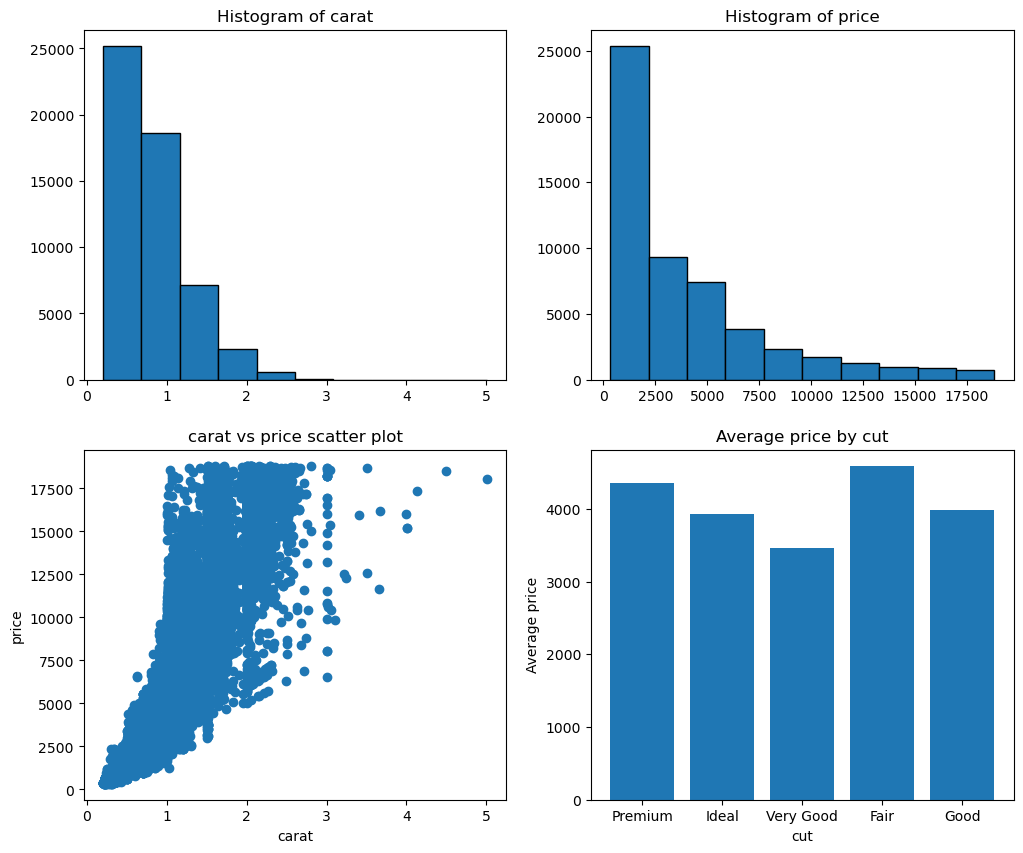

In [15]:
#     0   1
# 0  G1  G2
# 1  G3  G4
fig,axes=plt.subplots(2,2,figsize=(12,10))
#histogram graph 1
axes[0,0].hist(df['carat'],bins=10,edgecolor='black')
axes[0,0].set_title("Histogram of carat")
#histogram graph 2
axes[0,1].hist(df['price'],bins=10,edgecolor='black')
axes[0,1].set_title("Histogram of price")
#scatter graph 3
axes[1,0].scatter(df['carat'],df['price'])
axes[1,0].set_title("carat vs price scatter plot")
axes[1,0].set_xlabel('carat')
axes[1,0].set_ylabel('price')
#bar graph 4
axes[1,1].bar(df['cut'].unique(),df.groupby('cut')['price'].mean())
axes[1,1].set_title('Average price by cut')
axes[1,1].set_xlabel('cut')
axes[1,1].set_ylabel('Average price')
plt.show()